In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

<img src="https://www.evernote.com/l/AAFyWbRBljJIqqUfNcOo8SvvvPa3gCnvCsAB/image.png" width="400px">

In [2]:
data_df = pd.read_pickle('../data/ball_on_spring.p')

In [3]:
data_df.sample(4)

,x_a,x_b,x_c,y_a,y_b,y_c
134,-0.636656,-0.439142,-0.183176,-0.220483,0.806493,-0.748230
36,1.565411,1.825616,0.978518,0.911528,0.326394,1.809986
145,1.109253,1.768186,0.604263,0.611077,0.243026,1.373415
141,0.368817,1.373556,0.572168,0.194070,0.527686,0.667839


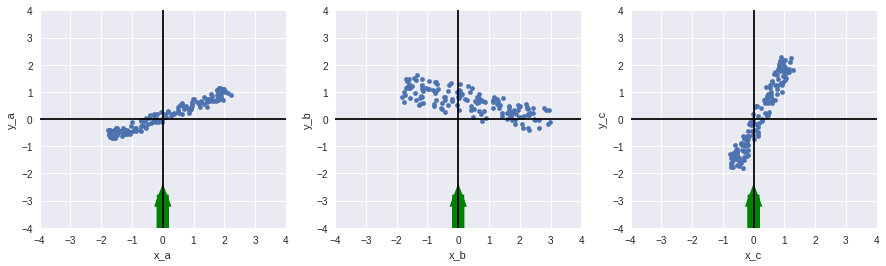

In [4]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i, cam in enumerate(['a', 'b', 'c']):
    x_axis = 'x_{}'.format(cam)
    y_axis = 'y_{}'.format(cam)
    
    data_df.plot(x_axis, y_axis, kind='scatter', 
                 ax=ax[i], xlim=(-4,4), ylim=(-4,4))
    
    ax[i].axvline(c='black')
    ax[i].axhline(c='black')
    ax[i].arrow(0,-4,0,1,color='green',lw=12)

We can think of the green arrow as the camera.

### Variance and the Goal

At a high-level, our goal is to find a transformation for our data so that it is a "best expression" of the data.

Mathematically, this looks like this 

$$X' = PX$$

where $X$ is the original data and $X'$ is the transformed, "best expression" of the data. 

$P$ is a permutation or transformation matrix. 

# Assumptions and Limits

1. Linearity
2. Scaled, Skew-Normal Data
3. Larger variances are more important
4. The principal components are orthogonal

### Numpy Derivation

Let $X$ be our data.

In [5]:
X = data_df

First look at $X^TX$.

**NOTE:** $X^TX$ is a symmetric matrix.

In [6]:
X.shape

(150, 6)

In [50]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
x_a,-1.781950,-1.709077,-1.617304,-1.693962,-1.292920,-1.513921,-1.325127,-1.163089,-0.743689,-0.876423,...,0.479643,0.368817,0.852555,0.915658,0.984858,1.109253,1.164353,1.409310,1.571823,1.736579
x_b,-1.761277,-1.160804,-0.956732,-0.787909,-0.973692,-1.562961,-0.762026,-0.560522,-0.297886,0.064933,...,0.206629,1.373556,0.843636,1.287123,1.586848,1.768186,1.732810,2.344889,1.655708,2.063614
x_c,-0.350870,-0.755488,-0.467356,-0.545706,-0.383676,-0.559612,-0.529735,-0.319409,-0.279028,-0.305009,...,0.516240,0.572168,0.378523,0.523829,0.744094,0.604263,0.533726,0.651382,0.836770,0.997008
y_a,-0.403847,-0.459641,-0.655109,-0.516117,-0.337848,-0.332560,-0.492215,-0.418613,-0.393115,-0.341021,...,0.347126,0.194070,0.217961,0.403811,0.742200,0.611077,0.551551,0.735983,0.724462,0.677989
y_b,0.984246,1.235856,1.118372,0.484307,1.123871,0.793864,1.357246,0.391693,1.259620,1.047290,...,0.738837,0.527686,0.314363,0.651461,0.235718,0.243026,-0.039737,0.232006,0.475243,0.065319
y_c,-1.792404,-1.277236,-1.551299,-1.326873,-1.129003,-1.134841,-1.107987,-1.173009,-0.994968,-0.929750,...,0.272217,0.667839,0.591616,0.645657,1.105620,1.373415,1.131138,1.643790,1.821893,1.967430


In [49]:
X

,x_a,x_b,x_c,y_a,y_b,y_c
0,-1.781950,-1.761277,-0.350870,-0.403847,0.984246,-1.792404
1,-1.709077,-1.160804,-0.755488,-0.459641,1.235856,-1.277236
2,-1.617304,-0.956732,-0.467356,-0.655109,1.118372,-1.551299
3,-1.693962,-0.787909,-0.545706,-0.516117,0.484307,-1.326873
4,-1.292920,-0.973692,-0.383676,-0.337848,1.123871,-1.129003
5,-1.513921,-1.562961,-0.559612,-0.332560,0.793864,-1.134841
6,-1.325127,-0.762026,-0.529735,-0.492215,1.357246,-1.107987
7,-1.163089,-0.560522,-0.319409,-0.418613,0.391693,-1.173009
8,-0.743689,-0.297886,-0.279028,-0.393115,1.259620,-0.994968
9,-0.876423,0.064933,-0.305009,-0.341021,1.047290,-0.929750


In [51]:
X.T.dot(X)

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,250.246323,269.451961,114.742326,107.362913,-55.397329,246.954250
x_b,269.451961,321.813210,130.777556,121.046973,-31.274187,270.798903
x_c,114.742326,130.777556,59.299992,52.178046,-10.107374,114.732745
y_a,107.362913,121.046973,52.178046,50.375485,-13.743635,107.856838
y_b,-55.397329,-31.274187,-10.107374,-13.743635,88.893924,-50.320877
y_c,246.954250,270.798903,114.732745,107.856838,-50.320877,249.138756


### Gramian Matrix

In [7]:
X.T.dot(X)

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,250.246323,269.451961,114.742326,107.362913,-55.397329,246.954250
x_b,269.451961,321.813210,130.777556,121.046973,-31.274187,270.798903
x_c,114.742326,130.777556,59.299992,52.178046,-10.107374,114.732745
y_a,107.362913,121.046973,52.178046,50.375485,-13.743635,107.856838
y_b,-55.397329,-31.274187,-10.107374,-13.743635,88.893924,-50.320877
y_c,246.954250,270.798903,114.732745,107.856838,-50.320877,249.138756


Let's look at the covariance matrix of $X$.

In [8]:
X.cov()

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,1.659341,1.743069,0.739484,0.696700,-0.460090,1.630577
x_b,1.743069,1.948139,0.778560,0.735099,-0.495977,1.730498
x_c,0.739484,0.778560,0.351553,0.313986,-0.201823,0.729298
y_a,0.696700,0.735099,0.313986,0.309865,-0.196704,0.692123
y_b,-0.460090,-0.495977,-0.201823,-0.196704,0.209970,-0.455227
y_c,1.630577,1.730498,0.729298,0.692123,-0.455227,1.636361


And the correlation matrix of $X$.

In [9]:
X.corr()

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,1.000000,0.969476,0.968201,0.971609,-0.779465,0.989541
x_b,0.969476,1.000000,0.940777,0.946127,-0.775484,0.969218
x_c,0.968201,0.940777,1.000000,0.951324,-0.742843,0.961546
y_a,0.971609,0.946127,0.951324,1.000000,-0.771168,0.971980
y_b,-0.779465,-0.775484,-0.742843,-0.771168,1.000000,-0.776624
y_c,0.989541,0.969218,0.961546,0.971980,-0.776624,1.000000


There's no discernable pattern in there because the data is not conditioned.

### Conditioning The Data

Here we manually scale the data instead of importing `StandardScaler` from `sklearn.preprocessing`.

In [10]:
X.shape

(150, 6)

#### Center the Data

In [11]:
X.mean(), np.array(X).mean()

(x_a    0.141527
 x_b    0.458553
 x_c    0.214765
 y_a    0.167444
 y_b    0.619723
 y_c    0.188342
 dtype: float64, 0.29839222741877247)

In [12]:
X_c = X - X.mean()

### $X_{c}^TX_{c}$

In [13]:
X_c.T.dot(X_c)

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,247.241851,259.717344,110.183069,103.808252,-68.553431,242.955929
x_b,259.717344,290.272644,116.005374,109.529723,-73.900508,257.844174
x_c,110.183069,116.005374,52.381367,46.783885,-30.071625,108.665333
y_a,103.808252,109.529723,46.783885,46.169883,-29.308923,103.126332
y_b,-68.553431,-73.900508,-30.071625,-29.308923,31.285472,-67.828884
y_c,242.955929,257.844174,108.665333,103.126332,-67.828884,243.817830


### $X_{c}$ covariance

Note that `.cov()` calculates the **sample covariance** and is thus multiplied by a factor of $\frac{1}{n-1}$.

Here, we achieve identical results using `X_c.T.dot(X_c)/149` and `X.cov()`.

In [14]:
X_c.T.dot(X_c)/149 # 150 number of rows. 

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,1.659341,1.743069,0.739484,0.696700,-0.460090,1.630577
x_b,1.743069,1.948139,0.778560,0.735099,-0.495977,1.730498
x_c,0.739484,0.778560,0.351553,0.313986,-0.201823,0.729298
y_a,0.696700,0.735099,0.313986,0.309865,-0.196704,0.692123
y_b,-0.460090,-0.495977,-0.201823,-0.196704,0.209970,-0.455227
y_c,1.630577,1.730498,0.729298,0.692123,-0.455227,1.636361


In [15]:
X.cov()

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,1.659341,1.743069,0.739484,0.696700,-0.460090,1.630577
x_b,1.743069,1.948139,0.778560,0.735099,-0.495977,1.730498
x_c,0.739484,0.778560,0.351553,0.313986,-0.201823,0.729298
y_a,0.696700,0.735099,0.313986,0.309865,-0.196704,0.692123
y_b,-0.460090,-0.495977,-0.201823,-0.196704,0.209970,-0.455227
y_c,1.630577,1.730498,0.729298,0.692123,-0.455227,1.636361


##### Remember: assertions go silent when they pass

In [16]:
np.testing.assert_array_almost_equal(X_c.T.dot(X_c)/149, X.cov())

### $X_{sc}$ correlation

The correlation matrix is scaled data. 

Note that `.corr` calculates the **population correlation** and is the scaled data multiplied by a factor of $\frac1n$.

#### Scale the Data

In [17]:
X_sc = X_c/X.std(ddof=0)

In [18]:
X_sc.T.dot(X_sc)/150

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,1.000000,0.969476,0.968201,0.971609,-0.779465,0.989541
x_b,0.969476,1.000000,0.940777,0.946127,-0.775484,0.969218
x_c,0.968201,0.940777,1.000000,0.951324,-0.742843,0.961546
y_a,0.971609,0.946127,0.951324,1.000000,-0.771168,0.971980
y_b,-0.779465,-0.775484,-0.742843,-0.771168,1.000000,-0.776624
y_c,0.989541,0.969218,0.961546,0.971980,-0.776624,1.000000


In [19]:
X.corr()

,x_a,x_b,x_c,y_a,y_b,y_c
x_a,1.000000,0.969476,0.968201,0.971609,-0.779465,0.989541
x_b,0.969476,1.000000,0.940777,0.946127,-0.775484,0.969218
x_c,0.968201,0.940777,1.000000,0.951324,-0.742843,0.961546
y_a,0.971609,0.946127,0.951324,1.000000,-0.771168,0.971980
y_b,-0.779465,-0.775484,-0.742843,-0.771168,1.000000,-0.776624
y_c,0.989541,0.969218,0.961546,0.971980,-0.776624,1.000000


In [20]:
np.testing.assert_array_almost_equal(X_sc.T.dot(X_sc)/150, X.corr())

### This is Interesting

In [21]:
np.testing.assert_array_almost_equal(X_sc.corr(), X.corr())

Correlation is scale independent (think distributions).

## Datasets

### Conditioned Data
| dataset    | `numpy`                        | definition                                            |
|:-----------|--------------------------------|-------------------------------------------------------|
| $X$        | `X`                            | original                                              |
| $X_{c}$    | `X - X.mean()`                 | centered (subtract the mean)                          |
| $X_{sc}$   | `(X - X.mean())/X.std(ddof=0)` | scaled (subtract the mean, divide by std)             |

### Gramian Data
| dataset    | `numpy`                        | definition                                            |
|:-----------|--------------------------------|-------------------------------------------------------|
| $X^TX$     | `X.T.dot(X)` | the Gramian matrix for $X$ |
| $X_{cov}$  | `X.cov()` | pairwise covariance of columns, divided by $n-1$<br>$X_c^TX_c$, divided by $n-1$ |
| $X_{corr}$ | `X.corr()`| scaled, pairwise covariance, divided by $n$<br>$X_{sc}^TX_{sc}$, divided by $n$  |

##  EigenDecomposition of the Covariance

One tricky thing:

- `sklearn` uses the population covariance i.e. multiplied by $\frac{1}{n}$
- `pandas` uses the sample covariance i.e. multiplied by $\frac{1}{n-1}$


In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
eig_vals_cov, eig_vecs_cov = np.linalg.eig(X.cov()*149/150)

In [94]:
eig_vals_man, eig_vecs_man = np.linalg.eig(X_c.T.dot(X_c)/150)

display(eig_vals_man)
display(eig_vals_cov)

array([ 5.87040171,  0.07985087,  0.07340121,  0.02213566,  0.01537562,
        0.01329522])

array([ 5.87040171,  0.07985087,  0.07340121,  0.02213566,  0.01537562,
        0.01329522])

In [92]:
display(eig_vecs_cov)
display(eig_vecs_man)

array([[ 0.52682657,  0.17262649,  0.31625755, -0.17731535, -0.72479641,
        -0.18937914],
       [ 0.56671511, -0.17590956, -0.80209445, -0.04756028,  0.03888174,
        -0.02757786],
       [ 0.23611147,  0.1641343 ,  0.18238165, -0.77372634,  0.38199857,
         0.37346068],
       [ 0.22305483,  0.06201596,  0.19737089, -0.02885713,  0.48428456,
        -0.81980548],
       [-0.14965646,  0.93523925, -0.31227974,  0.0427291 , -0.01780559,
        -0.0571755 ],
       [ 0.52286577,  0.18384074,  0.29476888,  0.60414098,  0.30395213,
         0.38542453]])

array([[ 0.52682657,  0.17262649,  0.31625755, -0.17731535, -0.72479641,
        -0.18937914],
       [ 0.56671511, -0.17590956, -0.80209445, -0.04756028,  0.03888174,
        -0.02757786],
       [ 0.23611147,  0.1641343 ,  0.18238165, -0.77372634,  0.38199857,
         0.37346068],
       [ 0.22305483,  0.06201596,  0.19737089, -0.02885713,  0.48428456,
        -0.81980548],
       [-0.14965646,  0.93523925, -0.31227974,  0.0427291 , -0.01780559,
        -0.0571755 ],
       [ 0.52286577,  0.18384074,  0.29476888,  0.60414098,  0.30395213,
         0.38542453]])

In [83]:
eig_vecs_cov = pd.DataFrame(eig_vecs_cov)
eig_vecs_cov

,0,1,2,3,4,5
0,0.526827,0.172626,0.316258,-0.177315,-0.724796,-0.189379
1,0.566715,-0.175910,-0.802094,-0.047560,0.038882,-0.027578
2,0.236111,0.164134,0.182382,-0.773726,0.381999,0.373461
3,0.223055,0.062016,0.197371,-0.028857,0.484285,-0.819805
4,-0.149656,0.935239,-0.312280,0.042729,-0.017806,-0.057175
5,0.522866,0.183841,0.294769,0.604141,0.303952,0.385425


In [89]:
pd.DataFrame(pca.components_.T)

,0,1,2,3,4,5
0,0.526827,-0.172626,-0.316258,-0.177315,0.724796,-0.189379
1,0.566715,0.175910,0.802094,-0.047560,-0.038882,-0.027578
2,0.236111,-0.164134,-0.182382,-0.773726,-0.381999,0.373461
3,0.223055,-0.062016,-0.197371,-0.028857,-0.484285,-0.819805
4,-0.149656,-0.935239,0.312280,0.042729,0.017806,-0.057175
5,0.522866,-0.183841,-0.294769,0.604141,-0.303952,0.385425


In [27]:
eig_vecs_man = pd.DataFrame(eig_vecs_man)
eig_vecs_man

,0,1,2,3,4,5
0,0.526827,0.172626,0.316258,-0.177315,-0.724796,-0.189379
1,0.566715,-0.175910,-0.802094,-0.047560,0.038882,-0.027578
2,0.236111,0.164134,0.182382,-0.773726,0.381999,0.373461
3,0.223055,0.062016,0.197371,-0.028857,0.484285,-0.819805
4,-0.149656,0.935239,-0.312280,0.042729,-0.017806,-0.057175
5,0.522866,0.183841,0.294769,0.604141,0.303952,0.385425


In [28]:
try:
    np.testing.assert_array_almost_equal(eig_vecs_cov, eig_vecs_man)
except:
    print("Manual and Covariance are not equal.")
try:
    np.testing.assert_array_almost_equal(pca.components_.T, eig_vecs_man)
except:
    print("Manual and PCA Components are not equal.")

Manual and PCA Components are not equal.


In [29]:
eig_vals_man, eig_vals_cov

(array([ 5.87040171,  0.07985087,  0.07340121,  0.02213566,  0.01537562,
         0.01329522]),
 array([ 5.87040171,  0.07985087,  0.07340121,  0.02213566,  0.01537562,
         0.01329522]))

In [30]:
pca.explained_variance_

array([ 5.90980038,  0.08038678,  0.07389384,  0.02228422,  0.01547882,
        0.01338445])

# A Principal Component Analysis is the EigenDecomposition of the Population Covariance Matrix

### We can state the sklearn PCA algorithm as such

1. for data $A$
2. center the data $A_c = A - A_\mu$
2. calculate $A_c^TA_c$
3. divide $A_c^TA_c$ by $n$
4. find the eigendecomposition of this matrix, $S\Lambda S^T$
5. the explained variances are the eigenvalues, the principal components are S.

### Explained Variance Ratio

Explained variance ratio scales all of the explained variance values so that the sum of the explained variances is 1.

In [31]:
pca.explained_variance_ratio_ # 96 percent of the data is in 1. The rest are just noise. 

array([ 0.96640712,  0.01314534,  0.01208358,  0.00364405,  0.00253119,
        0.00218871])

Basically almost all of our data is captured by the first principal component. 

In [32]:
pca_1 = PCA(n_components=3)

In [33]:
pca_1_vec = pca_1.fit_transform(X)
pca_1_vec

array([[ -3.62254918e+00,   9.30485667e-02,  -2.58586120e-01],
       [ -3.12013185e+00,  -7.40548986e-02,   2.11527975e-01],
       [ -3.05741789e+00,   7.10904411e-02,   3.76316577e-01],
       [ -2.77738876e+00,   6.70005015e-01,   2.58668754e-01],
       [ -2.58562930e+00,  -1.04078690e-01,   5.94814674e-02],
       [ -3.03003217e+00,   1.68671746e-01,  -4.13564840e-01],
       [ -2.57549883e+00,  -2.49862927e-01,   3.63233142e-01],
       [ -2.19935673e+00,   6.33501649e-01,   1.38369277e-01],
       [ -1.85114294e+00,  -2.45357299e-01,   4.22547931e-01],
       [ -1.64409351e+00,   2.90022913e-02,   6.64466933e-01],
       [ -1.20791102e+00,   1.21492057e-01,   2.88949287e-01],
       [ -1.09811548e+00,  -4.17907570e-01,   3.66568413e-01],
       [ -7.90024557e-01,  -7.70752269e-02,  -2.32202115e-03],
       [ -4.11382935e-01,  -3.67811961e-01,   3.59983881e-01],
       [  4.97812269e-02,  -1.10386216e-01,   2.05721848e-01],
       [  2.22177842e-01,  -6.71515654e-02,   3.5123417

In [97]:
tt = np.array(range(150))
tt

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

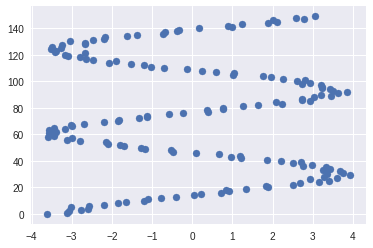

In [35]:
plt.scatter(pca_1_vec[:,0], tt)

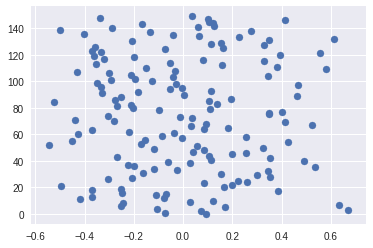

In [36]:
plt.scatter(pca_1_vec[:,1], tt)

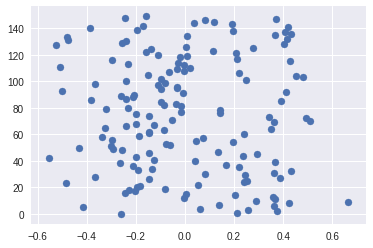

In [37]:
plt.scatter(pca_1_vec[:,2], tt)

In [99]:
#Testing on my own:
test = PCA(3)

In [103]:
test.fit_transform(X)[:,0]

array([-3.62254918, -3.12013185, -3.05741789, -2.77738876, -2.5856293 ,
       -3.03003217, -2.57549883, -2.19935673, -1.85114294, -1.64409351,
       -1.20791102, -1.09811548, -0.79002456, -0.41138294,  0.04978123,
        0.22217784,  0.70453362,  0.9227849 ,  0.84713576,  1.34489875,
        1.89429078,  1.83360399,  2.51647674,  2.6841718 ,  3.15177119,
        3.40371667,  2.93401923,  3.59719168,  3.28484391,  3.93265382,
        3.3658773 ,  3.76306854,  3.68461731,  3.26475007,  3.42749877,
        3.34167115,  2.76297877,  2.97099159,  2.50730557,  2.71119095,
        2.21854798,  1.85338941,  1.21920489,  0.97441245,  1.19395379,
        0.67829697,  0.08743049, -0.48169627, -0.53748934, -1.17716127,
       -1.26484487, -1.70635971, -1.80153114, -2.10459988, -2.14278557,
       -2.79801883, -3.12192982, -3.00037821, -3.60226068, -3.43595287,
       -3.43222144, -3.57274807, -3.39175882, -3.5580103 , -3.15601109,
       -3.43351066, -2.987689  , -3.01168262, -2.69567744, -2.20

In [110]:
numbers = np.arange(1,151)
numbers

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

In [111]:
len(test.fit_transform(X)[:,0])

150

In [112]:
len(numbers)

150

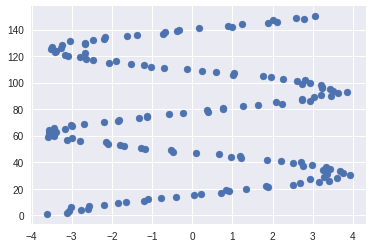

In [113]:
plt.scatter(test.fit_transform(X)[:,0], numbers)

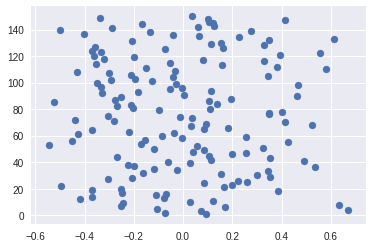

In [114]:
plt.scatter(test.fit_transform(X)[:,1], numbers)

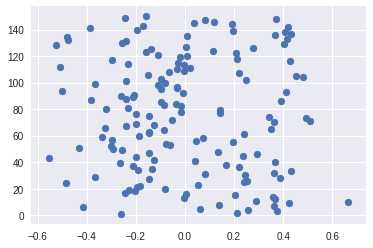

In [115]:
plt.scatter(test.fit_transform(X)[:,2], numbers)